<a href="https://colab.research.google.com/github/Aditya-y9/pSYcode/blob/Aditya/Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split



full=pd.read_csv('/content/Instagram User Stats.csv', sep=',', na_values='NaN')

In [4]:
# print(full)
headers = list(full.columns.values)
# print(headers)
X = np.array(full[headers[1:-2]])
y = np.array(full[headers[-1]])


X[:,0] = np.log(X[:,0]+2)
X[:,1] = np.log(X[:,1]+2)
X[:,2] = np.log(X[:,2]+2)
X[:,3] = X[:,3] * 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=42)
print(full)
print(X)

          id  pos    flr   flg      eg         er        fg       op
0          1  702    906   677  0.1891   6.070640  1.177860  14.8936
1          2  160    386   713  0.1950   6.260800  0.094127  16.9811
2          3  851  20400  3700  0.0664   0.717416  2.242440  38.2166
3          4   42    900  7500  0.0592   1.901230  7.643310  60.1626
4          5   50    486  4350  0.5112  16.409500  0.372900  61.9403
...      ...  ...    ...   ...     ...        ...       ...      ...
70404  70405   78    149   199  0.2497   8.016400  0.410959  45.0704
70405  70406   27     64    48  0.4511  14.479200  0.970664  10.3448
70406  70407   85    506   652  0.1201   3.853750  0.000000  43.1507
70407  70408   57    107    31  0.4222  13.551400 -1.675880  42.3729
70408  70409   53    208   336  0.2713   8.707260  0.590125  38.3562

[70409 rows x 8 columns]
[[ 6.55677836  6.81124438  6.52062113  1.891       6.07064   ]
 [ 5.08759634  5.96100534  6.57228254  1.95        6.2608    ]
 [ 6.74875955  9.923

In [5]:
clf = LinearRegression()
clf.fit(X, y)
print("LinearRegression")
print(clf.score(X_train,y_train))
print(clf.predict(X_train))
print(y_train)

LinearRegression
0.13472921883578115
[60.627843   34.67072114 52.28283125 ... 58.89379558 50.45037734
 48.88925793]
[29.2308 49.4382 47.8417 ... 83.9623 58.9474 53.3333]


In [6]:
growth=np.array(full['fg'])
engagement_grade = np.array(full['eg'])*10 #relative to follower count
engagement_rate = np.array(full['er'])*10 #relative to follower count
posts = np.log(full['pos']+2) #number of posts
followers = np.log(full['flr']+2)
following = np.log(full['flg']+2)



compare = np.vstack(( posts,followers,following, engagement_grade,engagement_rate, growth )).T




visibility = np.array(full['op'])

clf = LinearRegression()
clf.fit(compare, visibility)
print("LinearRegression")
print(clf.score(compare,visibility))
print(clf.coef_)

LinearRegression
0.14125069280183744
[-2.1485043  -6.76438655  6.22247104 -0.45963088  0.03637827 -0.77078732]


<ipython-input-8-13f3cc3c8a63>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( np.log(full["pos"]+1) , color="skyblue", ax=axes[0, 0])
<ipython-input-8-13f3cc3c8a63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( np.log(full["flr"]+1) , color="olive", ax=axes[0, 1])
<ipython-input-8-13f3cc3

<Axes: xlabel='er', ylabel='Density'>

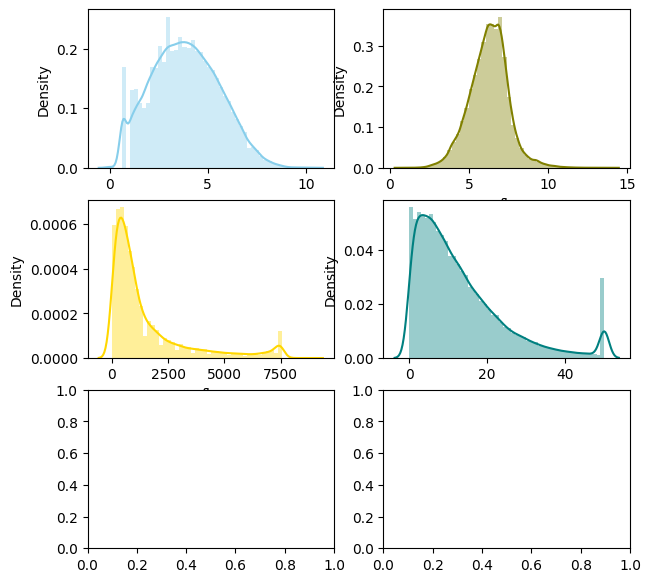

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns




f, axes = plt.subplots(3, 2, figsize=(7, 7))
sns.distplot( np.log(full["pos"]+1) , color="skyblue", ax=axes[0, 0])
sns.distplot( np.log(full["flr"]+1) , color="olive", ax=axes[0, 1])
sns.distplot( full["flg"] , color="gold", ax=axes[1, 0])
sns.distplot( full["er"] , color="teal", ax=axes[1, 1])


In [7]:
from sklearn import preprocessing

growth=np.array(full['fg'])
engagement_rate = np.array(full['er']) #relative to follower count
posts = np.log(full['pos']+2) #number of posts
followers = np.log(full['flr']+2)
following = full['flg']


X_train = np.vstack(( engagement_rate,)).T

#posts,followers,following,engagement_rate, growth

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_tranformed = scaler.transform(X_train)


visibility = np.array(full['op'])

y = followers

clf = LinearRegression()
clf.fit(X_train_tranformed, y)
print("LinearRegression")
print(clf.score(X_train_tranformed,y))
print(clf.coef_)

LinearRegression
0.20370921397145025
[-0.54778859]
